# Palmer Penguins Modeling

Import the Palmer Penguins dataset and print out the first few rows.

Suppose we want to predict `bill_depth_mm` using the other variables in the dataset.

Which variables would we need to **dummify**?

- We need to dummify species, island, and sex.

In [33]:
!pip install palmerpenguins

In [34]:
from palmerpenguins import load_penguins
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import PolynomialFeatures
import pandas as pd
import numpy as np

In [35]:
penguins = load_penguins()

In [36]:
penguins

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,2007
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007
...,...,...,...,...,...,...,...,...
339,Chinstrap,Dream,55.8,19.8,207.0,4000.0,male,2009
340,Chinstrap,Dream,43.5,18.1,202.0,3400.0,female,2009
341,Chinstrap,Dream,49.6,18.2,193.0,3775.0,male,2009
342,Chinstrap,Dream,50.8,19.0,210.0,4100.0,male,2009


In [45]:
penguins.head()
penguins = penguins.dropna()
X = penguins.drop("bill_length_mm", axis=1)
y = penguins["bill_length_mm"]

X_train, X_test, y_train, y_test = train_test_split(X, y)

In [46]:
# Preprocessing: One-Hot-Encode
# Model Spec: Linear Regression

lr = LinearRegression()
enc = OneHotEncoder()
cols_to_encode = ["species", "island", "sex"]

ct = ColumnTransformer([
    ("One Hot Encoding", enc, cols_to_encode)
])

my_pipeline = Pipeline([
    ("Column Transform", ct),
    ("Linear Regression", lr)
])

In [47]:
fitted_pipeline = my_pipeline.fit(X_train, y_train)

In [48]:
fitted_pipeline.predict(X_test)

array([47.40234375, 40.703125  , 47.40234375, 50.83984375, 37.14453125,
       40.703125  , 48.9609375 , 40.703125  , 48.9609375 , 48.9609375 ,
       37.14453125, 50.83984375, 45.52734375, 40.6015625 , 40.703125  ,
       37.26953125, 40.6015625 , 45.52734375, 40.6015625 , 37.26953125,
       45.52734375, 48.9609375 , 40.6015625 , 40.578125  , 48.9609375 ,
       48.9609375 , 48.9609375 , 40.578125  , 48.9609375 , 40.578125  ,
       37.26953125, 45.52734375, 40.578125  , 37.14453125, 47.40234375,
       37.14453125, 50.83984375, 40.6015625 , 37.16796875, 45.52734375,
       37.14453125, 40.703125  , 45.52734375, 37.14453125, 47.40234375,
       37.14453125, 37.14453125, 37.16796875, 45.52734375, 47.40234375,
       47.40234375, 45.52734375, 37.26953125, 47.40234375, 47.40234375,
       37.16796875, 40.578125  , 45.52734375, 47.40234375, 45.52734375,
       47.40234375, 37.14453125, 50.83984375, 48.9609375 , 48.9609375 ,
       37.16796875, 45.52734375, 45.52734375, 37.14453125, 48.96

Let's use `bill_length_mm` to predict `bill_depth_mm`. Prepare your data and fit the following models on the entire dataset:

* Simple linear regression (e.g. straight-line) model
* Quadratic (degree 2 polynomial) model
* Cubic (degree 3 polynomial) model
* Degree 10 polynomial model

Make predictions for each model and plot your fitted models on the scatterplot.

In [49]:
# Cut the data down to just X: bill_length_mm and y: bill_depth_mm
X = penguins[["bill_length_mm"]]
y = penguins["bill_depth_mm"]
X_train, X_test, y_train, y_test = train_test_split(X, y)

## Linear Regression:

In [50]:
lr = LinearRegression()

my_pipeline = Pipeline([
    ("Linear Regression", lr)
])

In [51]:
fitted_pipeline = my_pipeline.fit(X_train, y_train)
linear_preds = fitted_pipeline.predict(X_test)

## Quadratic

In [52]:
lr = LinearRegression()
enc = OneHotEncoder()
poly = PolynomialFeatures(2)

cols_to_encode = ["bill_length_mm"]

ct = ColumnTransformer([
    ("Quadratic Tranform", poly, cols_to_encode)
])

my_pipeline = Pipeline([
    ("Column Transform", ct),
    ("Linear Regression", lr)
])

In [53]:
fitted_pipeline = my_pipeline.fit(X_train, y_train)
quadratic_preds = fitted_pipeline.predict(X_test)

## Cubic

In [54]:
lr = LinearRegression()
poly = PolynomialFeatures(3)

cols_to_encode = ["bill_length_mm"]

ct = ColumnTransformer([
    ("Quadratic Tranform", poly, cols_to_encode)
])

my_pipeline = Pipeline([
    ("Column Transform", ct),
    ("Linear Regression", lr)
])

In [55]:
fitted_pipeline = my_pipeline.fit(X_train, y_train)
cubic_preds = fitted_pipeline.predict(X_test)

## Degree 10

In [56]:
lr = LinearRegression()
poly = PolynomialFeatures(10)

cols_to_encode = ["bill_length_mm"]

ct = ColumnTransformer([
    ("Quadratic Tranform", poly, cols_to_encode)
])

my_pipeline = Pipeline([
    ("Column Transform", ct),
    ("Linear Regression", lr)
])

In [57]:
fitted_pipeline = my_pipeline.fit(X_train, y_train)
deg_10_preds = fitted_pipeline.predict(X_test)

In [58]:
X_test

,bill_length_mm
253,55.9
93,39.6
163,49.0
194,45.3
72,39.6
...,...
280,52.7
206,46.5
77,37.2
88,38.3


In [59]:
final_df = X_test
final_df["bill_depth_mm"] = y_test
final_df["Linear Predictions"] = linear_preds
final_df["Quadratic Predictions"] = quadratic_preds
final_df["Cubic Predictions"] = cubic_preds
final_df["Degree 10 Predictions"] = deg_10_preds
final_df.head()

,bill_length_mm,bill_depth_mm,Linear Predictions,Quadratic Predictions,Cubic Predictions,Degree 10 Predictions
253,55.9,17.0,16.289811,17.797273,18.370874,18.170323
93,39.6,18.1,17.487333,17.330966,17.576869,18.190593
163,49.0,16.1,16.796737,16.675653,16.475925,16.228333
194,45.3,13.7,17.068567,16.633072,16.641758,15.880715
72,39.6,17.2,17.487333,17.330966,17.576869,18.190593


In [60]:
from plotnine import ggplot, aes, geom_point, geom_line, labs

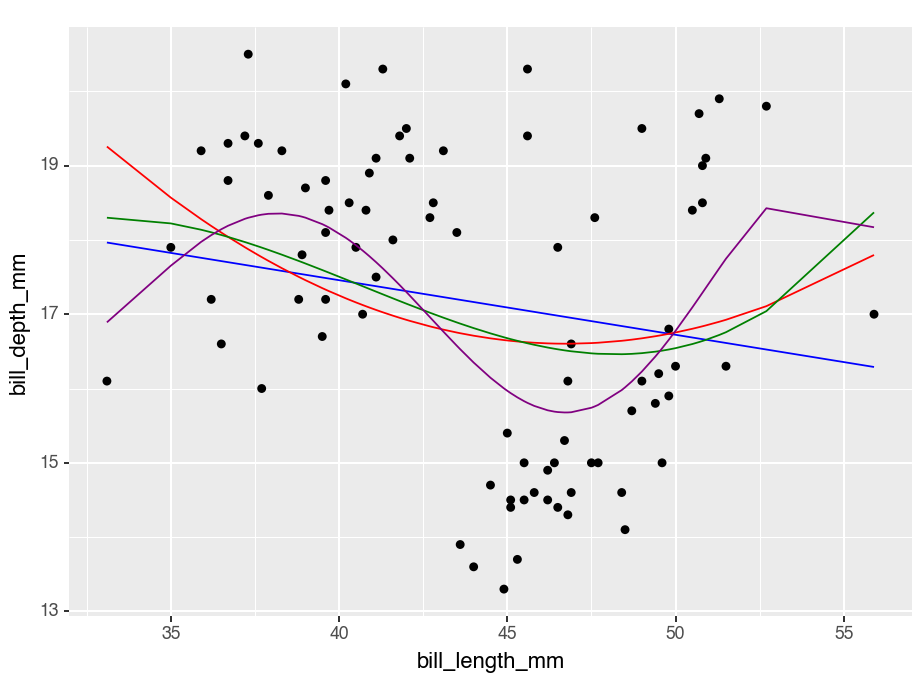

<Figure Size: (460 x 345)>

In [61]:
(ggplot(final_df, 
        aes(
            x="bill_length_mm", 
            y="bill_depth_mm"
        )) +
    geom_point() +
    geom_line(final_df, aes(x='bill_length_mm', y='Linear Predictions'), color='blue') +
    geom_line(final_df, aes(x='bill_length_mm', y='Quadratic Predictions'), color='red') +
    geom_line(final_df, aes(x='bill_length_mm', y='Cubic Predictions'), color='green') +
    geom_line(final_df, aes(x='bill_length_mm', y='Degree 10 Predictions'), color='purple')
)

* Are any of the models above underfitting the data? If so, which ones and how can you tell?
* Are any of thhe models above overfitting the data? If so, which ones and how can you tell?
* Which of the above models do you think fits the data best and why?

### I ran my models multiple times, and there is a level of randomness to the final result each time.
- However, it seems to me that the simple linear regression line (blue)  underfits the data. There's a bit of an up and down pattern we observe that is not captured by the simple linear regression.
- The Degree 10 polynomial definitely overfits the data. While it generally follows the pattern, it matches a bit too closely and in my mind doesn't capture the overall trend.
- Both degree 2 and 3 models do well, but I'd have to choose quadratic due to the explosive upward trend of the cubic at the end.

This data is a little challenging to fit with any line, and each run was a little different, but I feel that quadratic and cubic are better than simple linear regression or a degree 10 polynomial.